<a href="https://colab.research.google.com/github/avirals14/ybi_training/blob/main/Internship_Projects_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Title of Project**

Big Sales Prediction using Random Forest Regressor

---

# Objective
 To predict sales of a product in stores refers or forecasting the future sales performance of a particular product within a retail setting.The objective of using a Random Forest Regressor for big sales prediction is to develop a predictive model that can accurately forecast sales for a given period based on various input variables or features.

# Data Source
 YBI GitHub Repository

# Import Library

In [1]:
import pandas as pd

# Import Data

In [2]:
df = pd.read_csv('https://github.com/YBI-Foundation/Dataset/raw/main/Big%20Sales%20Data.csv')

# Describe Data

In [3]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDT36,12.3,Low Fat,0.111448,Baking Goods,33.4874,OUT049,1999,Medium,Tier 1,Supermarket Type1,436.608721
1,FDT36,12.3,Low Fat,0.111904,Baking Goods,33.9874,OUT017,2007,Medium,Tier 2,Supermarket Type1,443.127721
2,FDT36,12.3,LF,0.111728,Baking Goods,33.9874,OUT018,2009,Medium,Tier 3,Supermarket Type2,564.598400
3,FDT36,12.3,Low Fat,0.000000,Baking Goods,34.3874,OUT019,1985,Small,Tier 1,Grocery Store,1719.370000
4,FDP12,9.8,Regular,0.045523,Baking Goods,35.0874,OUT017,2007,Medium,Tier 2,Supermarket Type1,352.874000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                11815 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                14204 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          14204 non-null  float64
dtypes: float64(4), int64(1), object(7)
memory usage: 1.3+ MB


In [5]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,11815.000000,14204.000000,14204.000000,14204.000000,14204.000000
mean,12.788355,0.065953,141.004977,1997.830681,2185.836320
std,4.654126,0.051459,62.086938,8.371664,1827.479550
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.710000,0.027036,94.012000,1987.000000,922.135101
50%,12.500000,0.054021,142.247000,1999.000000,1768.287680
75%,16.750000,0.094037,185.855600,2004.000000,2988.110400
max,30.000000,0.328391,266.888400,2009.000000,31224.726950


In [6]:
df.shape

(14204, 12)

In [7]:
df.nunique()

Item_Identifier               1559
Item_Weight                    416
Item_Fat_Content                 5
Item_Visibility              13006
Item_Type                       16
Item_MRP                      8052
Outlet_Identifier               10
Outlet_Establishment_Year        9
Outlet_Size                      3
Outlet_Location_Type             3
Outlet_Type                      4
Item_Outlet_Sales             9144
dtype: int64

# Data Visualization

array([[<Axes: title={'center': 'Item_Weight'}>,
        <Axes: title={'center': 'Item_Visibility'}>],
       [<Axes: title={'center': 'Item_MRP'}>,
        <Axes: title={'center': 'Outlet_Establishment_Year'}>],
       [<Axes: title={'center': 'Item_Outlet_Sales'}>, <Axes: >]],
      dtype=object)

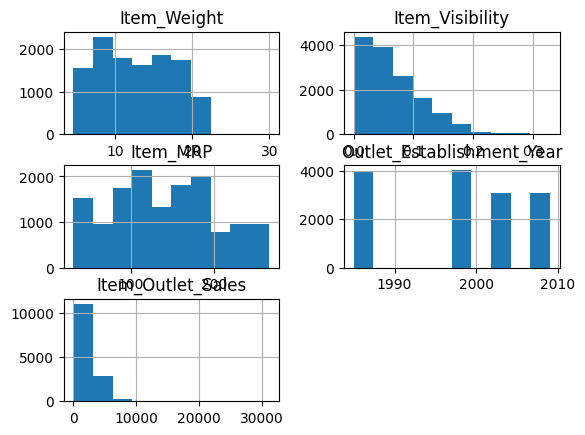

In [8]:
df.hist()

# Data Preprocessing

In [9]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                  2389
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [10]:
df['Item_Weight'].fillna(df.groupby(['Item_Type'])['Item_Weight'].transform('mean'),inplace=True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                14204 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                14204 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          14204 non-null  float64
dtypes: float64(4), int64(1), object(7)
memory usage: 1.3+ MB


In [12]:
df[['Item_Identifier']].value_counts()

Item_Identifier
FDQ08              10
FDO24              10
FDQ19              10
FDQ28              10
FDQ31              10
                   ..
FDM52               7
FDM50               7
FDL50               7
FDM10               7
FDR51               7
Name: count, Length: 1559, dtype: int64

In [13]:
df[['Item_Fat_Content']].value_counts()

Item_Fat_Content
Low Fat             8485
Regular             4824
LF                   522
reg                  195
low fat              178
Name: count, dtype: int64

In [14]:
df.replace({'Item_Fat_Content':{'LF':'Low Fat','reg':'Regular','low fat':'Low Fat'}},inplace=True)

In [15]:
df.replace({'Item_Fat_Content':{'Low Fat':0,'Regular':1}},inplace=True)

In [16]:
df[['Item_Fat_Content']].value_counts()

Item_Fat_Content
0                   9185
1                   5019
Name: count, dtype: int64

In [17]:
df[['Item_Type']].value_counts()

Item_Type            
Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: count, dtype: int64

In [18]:
df.replace({'Item_Type':{'Fruits and Vegetables':0,'Snack Foods':0,'Household':1,'Frozen Foods':0,'Dairy':0,'Baking Goods':0,'Canned':0,'Health and Hygiene':1,'Meat':0,'Soft Drinks':0,'Breads':0,'Hard Drinks':0,'Others':2,'Starchy Foods':0,'Breakfast':0,'Seafood':0}},inplace=True)

In [19]:
df[['Outlet_Identifier']].value_counts()

Outlet_Identifier
OUT027               1559
OUT013               1553
OUT035               1550
OUT046               1550
OUT049               1550
OUT045               1548
OUT018               1546
OUT017               1543
OUT010                925
OUT019                880
Name: count, dtype: int64

In [20]:
df.replace({'Outlet_Identifier':{'OUT027':0,'OUT013':1,'OUT049':2,'OUT046':3,'OUT035':4,'OUT045':5,'OUT018':6,'OUT017':7,'OUT010':8,'OUT019':9}},inplace=True)

In [21]:
df[['Outlet_Size']].value_counts()

Outlet_Size
Medium         7122
Small          5529
High           1553
Name: count, dtype: int64

In [22]:
df.replace({'Outlet_Size':{'Small':0,'Medium':1,'High':2}},inplace=True)

In [23]:
df[['Outlet_Location_Type']].value_counts()

Outlet_Location_Type
Tier 3                  5583
Tier 2                  4641
Tier 1                  3980
Name: count, dtype: int64

In [24]:
df.replace({'Outlet_Location_Type':{'Tier 3' :2,'Tier 2' :1,'Tier 1' :0}},inplace=True)

In [25]:
df[['Outlet_Type']].value_counts()

Outlet_Type      
Supermarket Type1    9294
Grocery Store        1805
Supermarket Type3    1559
Supermarket Type2    1546
Name: count, dtype: int64

In [26]:
df.replace({'Outlet_Type':{'Supermarket Type1' :1,'Grocery Store' :0,'Supermarket Type3' :3,'Supermarket Type2' :2}},inplace=True)

In [27]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDT36,12.3,0,0.111448,0,33.4874,2,1999,1,0,1,436.608721
1,FDT36,12.3,0,0.111904,0,33.9874,7,2007,1,1,1,443.127721
2,FDT36,12.3,0,0.111728,0,33.9874,6,2009,1,2,2,564.598400
3,FDT36,12.3,0,0.000000,0,34.3874,9,1985,0,0,0,1719.370000
4,FDP12,9.8,1,0.045523,0,35.0874,7,2007,1,1,1,352.874000


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                14204 non-null  float64
 2   Item_Fat_Content           14204 non-null  int64  
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  int64  
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  int64  
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                14204 non-null  int64  
 9   Outlet_Location_Type       14204 non-null  int64  
 10  Outlet_Type                14204 non-null  int64  
 11  Item_Outlet_Sales          14204 non-null  float64
dtypes: float64(4), int64(7), object(1)
memory usage: 1.3+ MB


# Define Target Variable (y) and Feature Variables (X)

In [29]:
y=df['Item_Outlet_Sales']
X=df[['Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type']]

# Train Test Split

In [30]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=2529)

# Modeling

In [31]:
from sklearn.ensemble import RandomForestRegressor
rforest= RandomForestRegressor(random_state=2529)
rforest.fit(X_train, y_train)

RandomForestRegressor(random_state=2529)

# Prediction

In [32]:
y_pred = rforest.predict(X_test)

In [33]:
y_pred

array([1443.90928794,  508.75220564, 2014.58260097, ..., 1880.38481467,
       2387.74265171, 1135.17483487])

# Model Evaluation

In [34]:
from sklearn.metrics import mean_absolute_percentage_error,mean_absolute_error
mean_absolute_percentage_error(y_test,y_pred)

0.7041125691353189

In [35]:
mean_absolute_error(y_pred,y_test)

823.7497339166895